<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P9_Supervise%20Learning%20-%20SVM%20dan%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')

def oslink(input):
  return os.path.join("/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/P9", input)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.	Percobaan 1 : Implementasi Support Vector Machine (SVM)**

In [14]:
# Membaca file diabetes.csv
df = pd.read_csv(oslink("diabetes.csv"))

In [15]:
# melihat informasi dataset pada 5 baris pertama
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# menampilkan info dari tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [20]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7440944881889764

# **2.	Percobaan 2 : Implementasi Support Vector Regression (SVR)**

In [22]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv(oslink('Salary_Data.csv'))
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [44]:
import numpy as np

# memisahkan atribut dan label
X = data[['YearsExperience']]
y = data[['Salary']]

# mengubah bentuk atribut
X = X[::np.newaxis]
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


In [45]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=0.05)

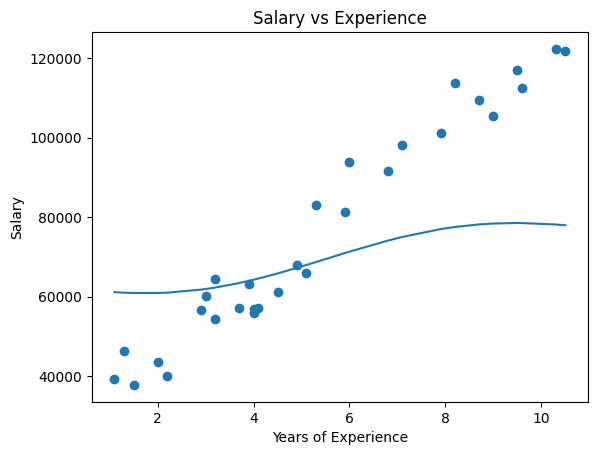

In [48]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(X, y)
plt.plot(X, model.predict(X))

# **3.	Percobaan 3 : Implementasi Naïve Bayes**

In [49]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# load dataset
dataset = pd.read_csv(oslink('iklan_sosmed.csv'), delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [59]:
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:,-1]
y

,Transaksi
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train

,Umur,Gaji
150,26,225000000
6,27,1260000000
260,35,1155000000
222,37,2160000000
220,41,1200000000
...,...,...
201,49,1110000000
168,29,2220000000
185,31,990000000
35,35,405000000


In [63]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_train

array([[        26,  225000000],
       [        27, 1260000000],
       [        35, 1155000000],
       [        37, 2160000000],
       [        41, 1200000000],
       [        42,  795000000],
       [        35,  375000000],
       [        50,  540000000],
       [        37, 1080000000],
       [        38,  915000000],
       [        43, 1935000000],
       [        46,  480000000],
       [        20, 1290000000],
       [        29,  420000000],
       [        47,  645000000],
       [        57,  900000000],
       [        40,  915000000],
       [        28, 1260000000],
       [        55, 1875000000],
       [        37,  930000000],
       [        25,  330000000],
       [        35,  330000000],
       [        19, 1140000000],
       [        26,  645000000],
       [        39, 2010000000],
       [        46, 1755000000],
       [        58, 1515000000],
       [        28, 1335000000],
       [        30, 1185000000],
       [        30, 1605000000],
       [  

In [64]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [65]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [71]:
# prediksi X_test
y_pred = classifier.predict(X_test)
y_pred


array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [70]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [72]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)


Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]


<ipython-input-73-e218580cc089>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


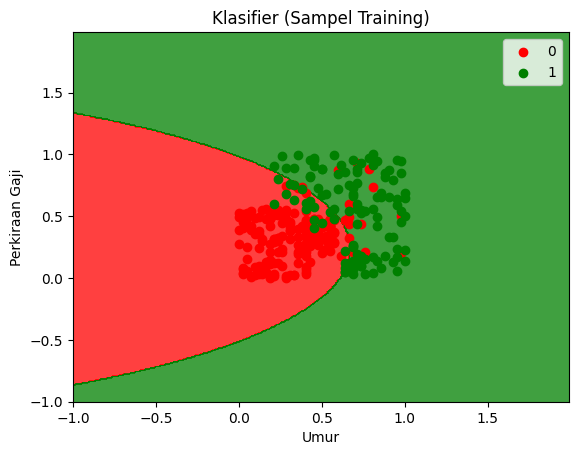

In [73]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()


<ipython-input-74-17e262dfe7b3>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


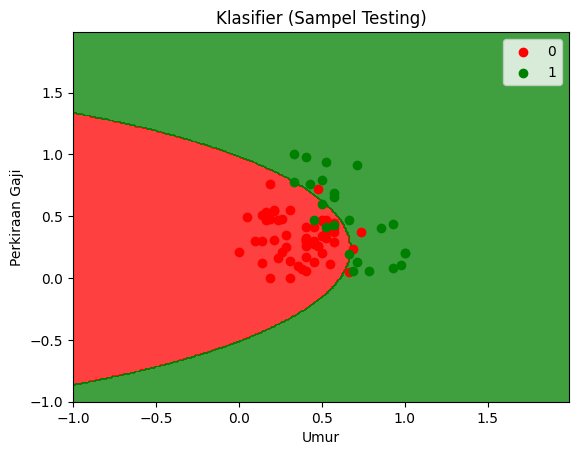

In [74]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
